In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
original_data_file = "HackathonData2024.csv"
df = pd.read_csv(original_data_file)

Dropping all features except for four

In [3]:
df = df.loc[:, ['Avg Open Pressure', 'Pressure Gradient (psi/ft) new', 'Avg Close Pressure', 'Avg Pump Difference']]

In [4]:
df.head()

,Avg Open Pressure,Pressure Gradient (psi/ft) new,Avg Close Pressure,Avg Pump Difference
0,3304.124833,0.593758,2719.898438,-0.93
1,3301.199254,0.597059,2934.885325,-8.45
2,2774.407080,0.516873,1589.948673,8.70
3,2653.539415,0.501287,1304.162878,NaN
4,NaN,0.503327,NaN,19.93


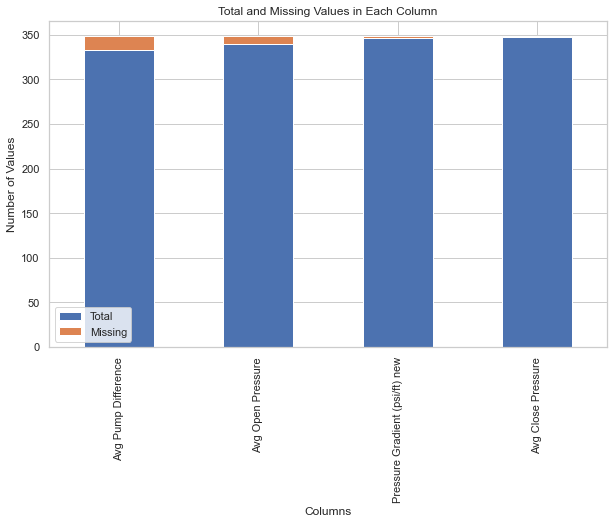

In [5]:
total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

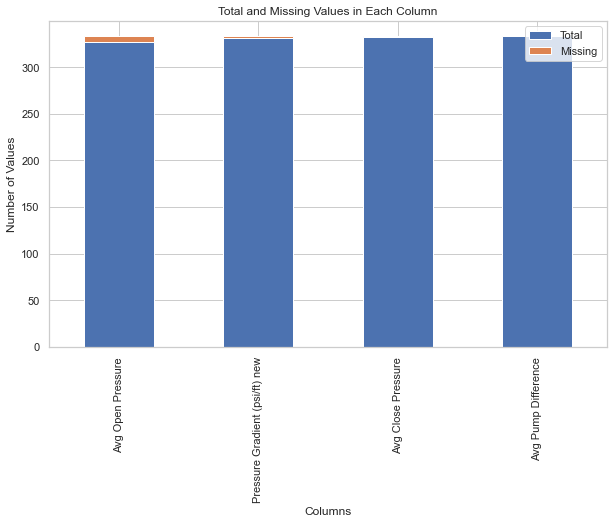

In [6]:
df = df.dropna(subset=['Avg Pump Difference'])


total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

In [7]:
imputer = IterativeImputer(max_iter=10, random_state=0)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Perform MICE imputation
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


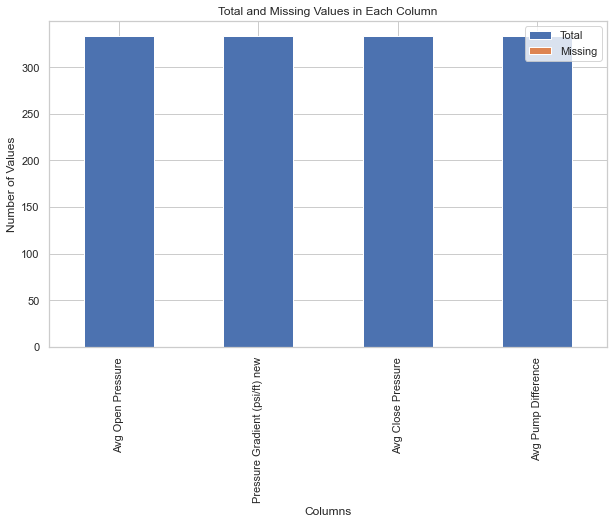

In [8]:
total = df.count()
missing = df.isnull().sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Total': total, 'Missing': missing})
plot_data = plot_data.sort_values(by='Missing', ascending=False)

# Plot
sns.set(style="whitegrid")
plot_data.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Total and Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Values')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

#df = pd.get_dummies(df, columns=['Fluid System'])
print(df.head)

<bound method NDFrame.head of      Avg Open Pressure  Pressure Gradient (psi/ft) new  Avg Close Pressure  \
0          3304.124833                        0.593758         2719.898438   
1          3301.199254                        0.597059         2934.885325   
2          2774.407080                        0.516873         1589.948673   
4          2838.997938                        0.503327         2282.889333   
5          2963.567911                        0.565200         2063.408619   
..                 ...                             ...                 ...   
343        2667.717992                        0.477837         2357.296098   
344        3056.211966                        0.512640         2032.922355   
345        2969.985594                        0.530874         1821.549742   
346        2761.233882                        0.478153         2149.114144   
347        2966.579531                        0.530376         1818.192820   

     Avg Pump Difference  
0     

Mean Squared Error: 343.19922218301593


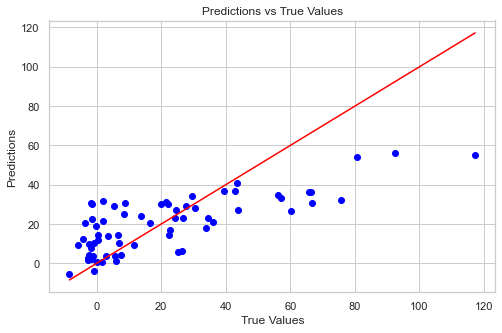

Mean Squared Error: 492.99286633010536


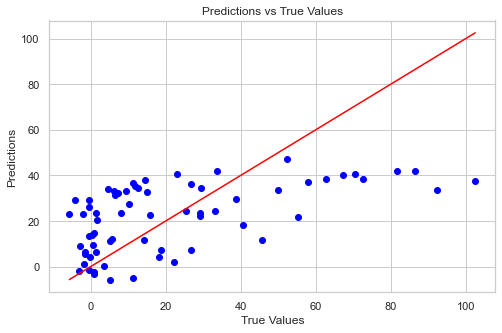

Mean Squared Error: 366.45418697643277


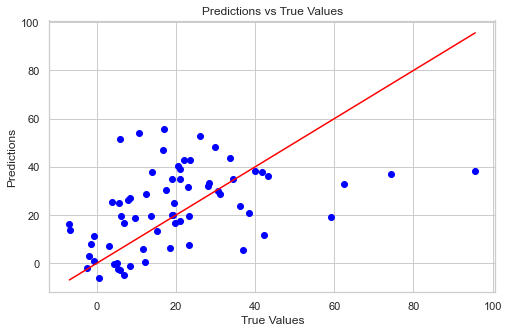

Mean Squared Error: 298.964113042074


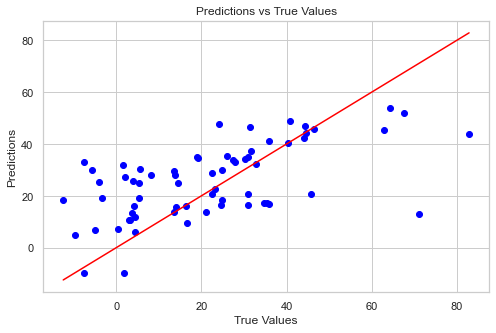

Mean Squared Error: 456.6419076126364


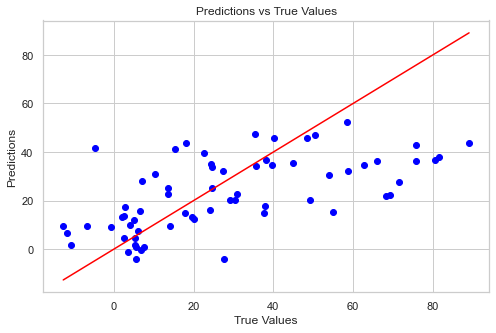

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 576x360 with 0 Axes>

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


X = df.drop('Avg Pump Difference', axis=1)
y = df['Avg Pump Difference']

# Create linear regression model
model = LinearRegression()

# Setup k-fold cross-validation
k = 5
kf = KFold(n_splits=k)

# Lists to store results of each fold
fold = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Store and display results
#     print(f"Fold {fold}:")
#     print(f"y_test: {y_test.values}")
#     print(f"y_pred: {y_pred}")
#     print("\n")
    
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs True Values')
    plt.grid(True)
    plt.show()

    fold += 1

model.fit(X, y)
X_pred = model.predict(X)
plt.figure(figsize=(8, 5))
plt.scatter(X, X_pred.values, color='blue')
plt.plot([min(X), max(X)], [min(X), max(X)], color='red')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Classifier
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.grid(True)
plt.show()